In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Changing defaults fonts for plot

font = {'family' : 'sans-serif',
        'size'   : 18}
plt.rc('font', **font)

In [3]:
#Reading necessary data files
df= pd.read_csv("2nd_fullscrape_clean.csv", index_col= 0, encoding='latin-1')


sono= pd.read_csv("Sonoma_weather_month.csv")
coast= pd.read_csv("CCoast_weather_month.csv")
valley= pd.read_csv("CValley_weather_month.csv")

In [4]:
#Processing monthly weather data to get yearly averages
sono["dt"] = pd.to_datetime(sono["date"])
sono["Year"]=sono["dt"].dt.year
sonogroup = sono.groupby("Year").mean()

coast["dt"] = pd.to_datetime(coast["date"])
coast["Year"]=coast["dt"].dt.year
coastgroup = coast.groupby("Year").mean()

valley["dt"] = pd.to_datetime(valley["date"])
valley["Year"]=valley["dt"].dt.year
valleygroup = valley.groupby("Year").mean()


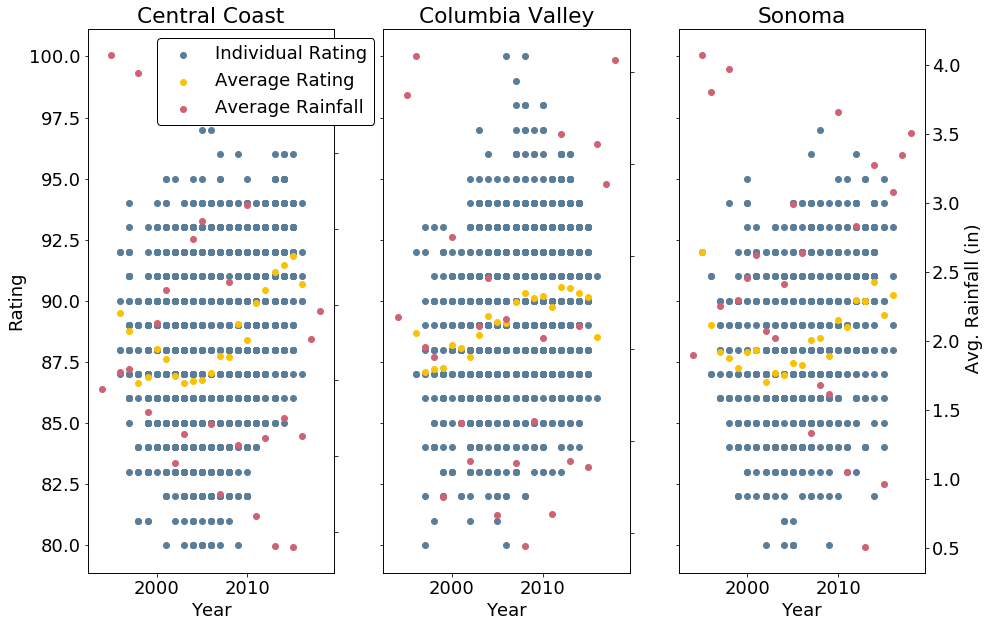

In [5]:
plt.close("all")
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize = (15,10))

#Scatter plot Rating vs. Year all wines grown in the Central Coast, Columbia Valley, and Sonoma

l0 =ax[0].scatter(df.loc[df[df["Location"] == "Central Coast"].index,"Year"],
           df.loc[df[df["Location"] == "Central Coast"].index,"Rating"], color="xkcd:steel blue", label="Individual Rating")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rating")
ax[0].set_title("Central Coast")

ax[1].scatter(df.loc[df[df["Location"] == "Columbia Valley"].index,"Year"],
           df.loc[df[df["Location"] == "Columbia Valley"].index,"Rating"], color="xkcd:steel blue")
ax[1].set_xlabel("Year" )
ax[1].set_title("Columbia Valley")

ax[2].scatter(df.loc[df[df["Location"] == "Sonoma"].index,"Year"],
           df.loc[df[df["Location"] == "Sonoma"].index,"Rating"], color="xkcd:steel blue")
ax[2].set_xlabel("Year")
ax[2].set_title("Sonoma")

#Adding average wine rating for each year and average rainfall for each location

group = df.groupby(["Location","Year"])["Rating"].mean()

l1 = ax[0].scatter(group["Central Coast"].index,group["Central Coast"].values, color="xkcd:goldenrod", label="Average Rating")
ax0 = ax[0].twinx()
l2 = ax0.scatter(coastgroup.index,coastgroup["PRCP"].values, color="xkcd:rose", label="Average Rainfall" )
ax0.set_yticklabels([])

lines = [l0, l1,l2] #necessary to get labels on single axis
labels = [l.get_label() for l in lines]
ax0.legend(lines, labels, loc="upper right", bbox_to_anchor=(1.2, 1), facecolor = "white" , edgecolor="black", framealpha=1)

ax[1].scatter(group["Columbia Valley"].index,group["Columbia Valley"].values, color="xkcd:goldenrod")
ax1 = ax[1].twinx()
ax1.scatter(valleygroup.index,valleygroup["PRCP"].values, color="xkcd:rose")
ax1.set_yticklabels([])

l1 = ax[2].scatter(group["Sonoma"].index,group["Sonoma"].values, color="xkcd:goldenrod")
ax2 = ax[2].twinx()
l2 = ax2.scatter(sonogroup.index,sonogroup["PRCP"].values, color="xkcd:rose")
ax2.set_ylabel(" Avg. Rainfall (in)")

plt.show()

Plot of Syrah wines grown, their average yearly rating, and the average yearly rainfall in three U.S. regions. A minor negative correlation between average rating and average rainfall may be inferred.